In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Kaggle Datasets/HeartAttack/heart.csv')

In [3]:
data.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
data.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

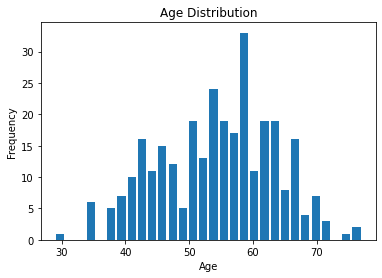

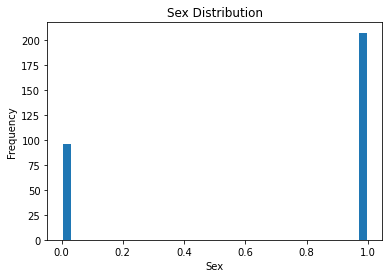

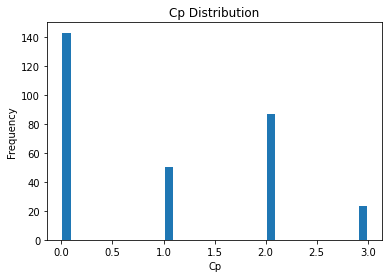

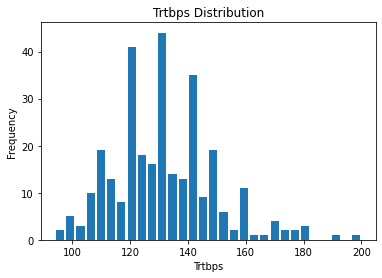

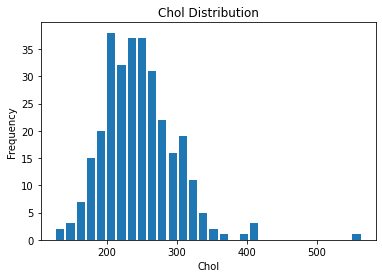

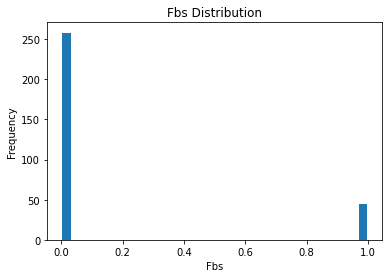

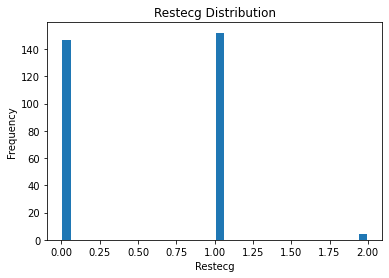

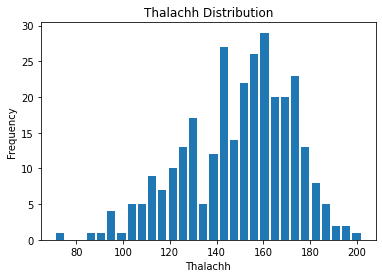

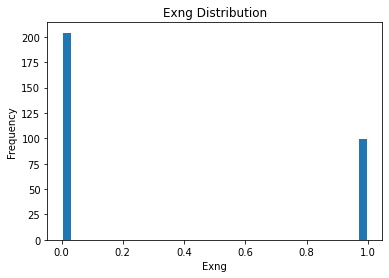

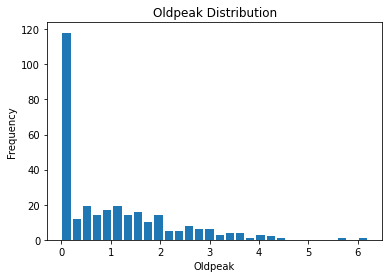

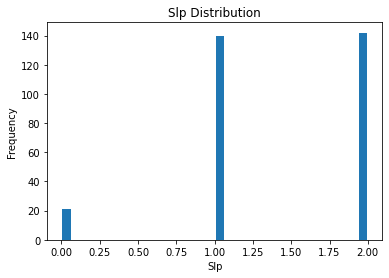

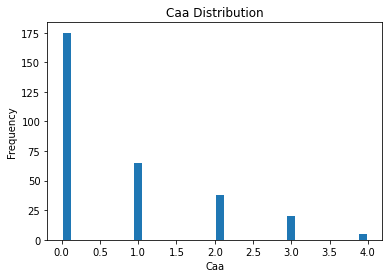

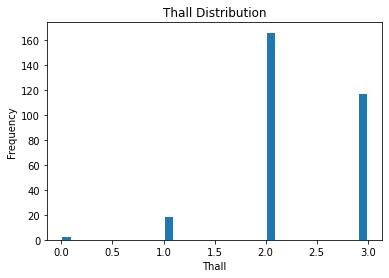

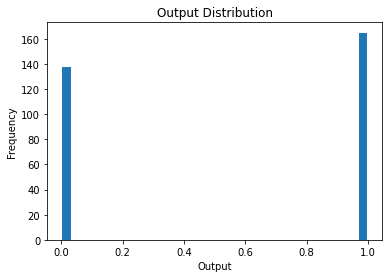

In [6]:
for i in data.columns:
    plt.title("{} Distribution".format(i).title())
    plt.xlabel("{}".format(i).capitalize())
    plt.ylabel("Frequency")
    plt.hist(data[i], bins =30,rwidth = 0.8);
    plt.show()

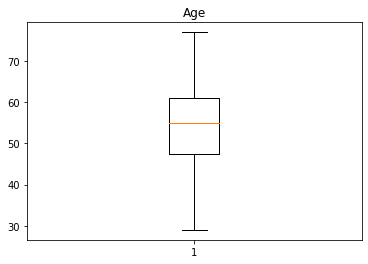

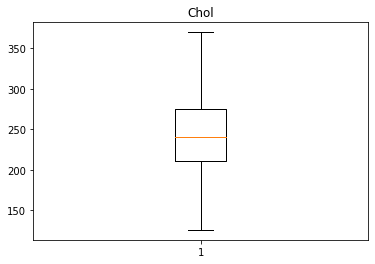

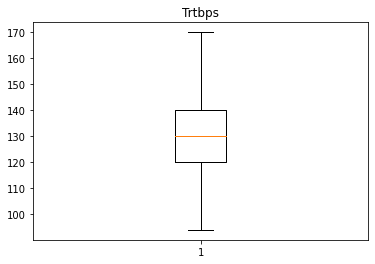

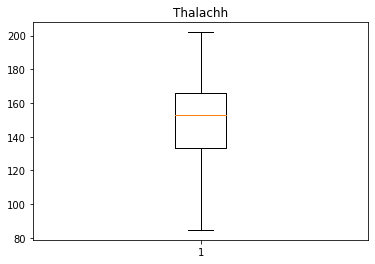

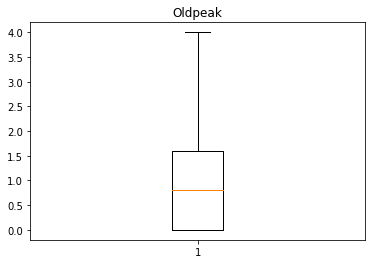

In [7]:
for i in ['age','chol','trtbps','thalachh','oldpeak']:    
    IQR = (data[i].quantile(0.75)-data[i].quantile(0.25))
    lowerOutlierLine = (data[i].quantile(0.25) - IQR*1.5)
    upperOutlierLine = (data[i].quantile(0.75) + IQR*1.5)
    data[i] = data[i].map(lambda x: lowerOutlierLine if x<lowerOutlierLine else upperOutlierLine if  x>upperOutlierLine else x)
    plt.boxplot(data[i])
    plt.title("{}".format(i).title())
    plt.show()

<AxesSubplot:>

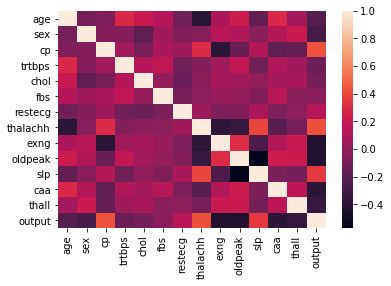

In [8]:
sns.heatmap(data.corr())

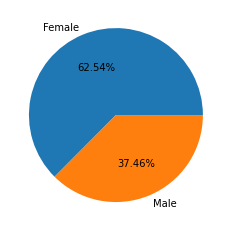

In [9]:
outputBySex = data.groupby('sex').output.mean()
plt.pie(outputBySex, labels=outputBySex.index.map({0:'Female',1:'Male'}), autopct = '%1.2f%%');

In [10]:
#No need for standardization or normalization due to using a tree classifier
y= data.output
X = data.drop(['output'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, shuffle = True)

In [11]:
from sklearn.model_selection import GridSearchCV
import xgboost as xg
from sklearn.ensemble import RandomForestClassifier

In [12]:
xgbClass = xg.XGBClassifier(n_jobs=-1, verbosity = 0)

In [15]:
params={'n_estimators' : [50,100,250,500],
       ' max_depth' : [1,2,4,6],
        'alpha':[0,2,4,8],
        'min_child_weight': [1,2,3,4,5,6],
        'gamma':[1,2,3,4,5,6]
}
model1 =  GridSearchCV(xgbClass, param_grid=params, cv=5, scoring="accuracy")

In [16]:
model1.fit(X_train,y_train)

c:\users\ayn_2\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\ayn_2\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\ayn_2\appdata\local\program

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, v

In [17]:
model1.best_params_

{' max_depth': 1,
 'alpha': 2,
 'gamma': 1,
 'min_child_weight': 6,
 'n_estimators': 50}

In [18]:
rfClass =RandomForestClassifier( n_jobs=-1,verbose = 0, oob_score=True)

In [21]:
params={
    'n_estimators':[25,50,100,200,300],
    'max_depth':[1,2,4,6],
    'min_samples_leaf' : [3,5,7,10],
}
model2=GridSearchCV(rfClass, param_grid=params, cv=5, scoring="accuracy")

In [22]:
model2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, oob_score=True),
             param_grid={'max_depth': [1, 2, 4, 6],
                         'min_samples_leaf': [3, 5, 7, 10],
                         'n_estimators': [25, 50, 100, 200, 300]},
             scoring='accuracy')

In [23]:
model2.best_params_

{'max_depth': 1, 'min_samples_leaf': 3, 'n_estimators': 200}

In [24]:
model1_proba = model1.predict_proba(X_test)[:,1]
model2_proba = model2.predict_proba(X_test)[:,1]

In [25]:
import sklearn.metrics as metrics
fpr1, tpr1, threshold = metrics.roc_curve(y_test, model1_proba)
fpr2, tpr2, threshold = metrics.roc_curve(y_test, model2_proba)
roc_auc1 = metrics.auc(fpr1, tpr1)
roc_auc2 = metrics.auc(fpr2, tpr2)

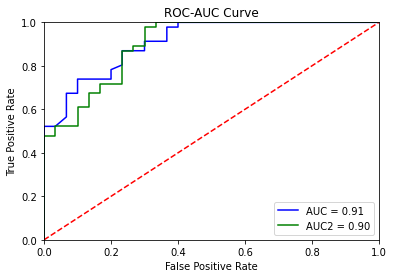

In [26]:
import matplotlib.pyplot as plt
plt.title('ROC-AUC Curve')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'g', label = 'AUC2 = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [27]:
from sklearn.metrics import accuracy_score
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
score1=accuracy_score(y_test,y_pred1)
score2=accuracy_score(y_test,y_pred2)

In [28]:
score1

0.8157894736842105

In [29]:
score2

0.8552631578947368

In [33]:
pickle_out = open("classifier.pkl","wb")
pickle.dump(model2, pickle_out)
pickle_out.close()